# Passo 1

## Importações necessárias

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Definição de funções

### Função de leitura

In [2]:
def load_spam_collection(data_path, seed=123):
    spamfilter_df = pd.read_csv(data_path, delimiter='\t', header=None)
    spamfilter_df.columns = ['label', 'message']
    
    ''' 
        All labels were changed to the following classification: 
        spam is converted to 1 and ham to 0.
    '''
    spamfilter_df['label'] = spamfilter_df['label'].apply(
        lambda x: 1 if(x == 'spam')
        else 0
    )

    '''
    Adding an additional column that represents the number of letters 
    per message, thus creating a table that provides the sample size information.
    '''
    spamfilter_df['sample_length'] = spamfilter_df['message'].apply(lambda x: len(x))

    return spamfilter_df

### Funções de análise de dados

In [3]:
def get_num_documents(spamfilter_df):
    return spamfilter_df.count()['label']


def get_num_words_per_document(spamfilter_df):
    sample_message = spamfilter_df['message'].tolist()
    num_words = [len(s.split()) for s in sample_message]
    return np.median(num_words)


def get_num_classes(spamfilter_df):
    return spamfilter_df.nunique()['label']


def plot_sample_length_distribuition(spamfilter_df):
    sns.histplot(
        spamfilter_df['sample_length'],
        kde=True,
        bins=50,
        color='blue'
    )


def plot_class_distribuition(spamfilter_df):
    labels = spamfilter_df['label'].value_counts()
    lp = labels.plot(kind='barh', color=['#66c2a5', '#fc8d62'])
    lp.set_yticks([0, 1])
    lp.set_yticklabels(['Ham', 'Spam'])

## Aplicando a análise

In [4]:
data_path = "data/SMSSpamCollection"  # You may need to change the directory on your machine for it to work.
spam_df = load_spam_collection(data_path)

spam_df.head()

,label,message,sample_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
num_doc = get_num_documents(spam_df)
print(f"Número total de documentos: {num_doc}")

In [28]:
num_word_per_document = get_num_words_per_document(spam_df)
print(f"Número médio de palavras por documento: {num_word_per_document}")

In [29]:
num_classes = get_num_classes(spam_df)
print(f"Número de classes: {num_classes}")

In [25]:
plot_sample_length_distribuition(spam_df)

In [24]:
plot_class_distribuition(spam_df)

# Passo 2

## Importações necessárias

In [5]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re # biblioteca para utilizar expressão regulares
from wordcloud import WordCloud # biblioteca para criar uma núvem de palavras

## Preprando dados para pré-processamento

In [6]:
nlp = spacy.load("en_core_web_sm")
stop_words = STOP_WORDS

# stop_words

In [7]:
punctuation = string.punctuation

# punctuation

## Função que pré-processa os dados

In [11]:
def processing(texts):
    result = [] 
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # vetor que permite escolher somente entre adjetivos, substantivos, verbos e pronomes
    text = re.sub(r'(https?://[^\s\n\r]+|www\.[^\s\n\r]+|[0-9@#&!?:,.\)\(;])', '', texts) # expressão regular que retira do texto todos os números e simbolos &#;
    doc = nlp(texts.lower())

    for token in doc:
        if(token.text in stop_words or token.text in punctuation or len(token.text) <= 3 or token.text == "ltgt"):
            continue
        
        if(token.pos_ in pos_tag):
            result.append(token.text)
        
        text = ' '.join(str(element) for element in result if not element.isdigit())
    
    return text

## Aplicando o pré-processamento

In [ ]:
spam_df.message = spam_df.message.astype(str)
spam_df['processed_message'] = spam_df['message'].apply(processing)

spam_df.head()

## Vizualização do resultado final

In [10]:
total_message = spam_df['processed_message'].values
result_total_message = ''

for word in total_message:
    result_total_message += word + " "

result_total_message

'jurong point crazy available bugis great world buffet cine joking free entry wkly comp final tkts 21st text receive entry question(std rate)t&c apply 08452810075over18 early think goes lives darling week word like chgs send brother like speak treat aids patent request melle melle minnaminunginte nurungu vettam callertune callers press copy friends callertune winner valued network customer selected receivea prize reward claim claim code kl341 valid hours mobile months entitled update latest colour mobiles camera free mobile update free want talk stuff tonight cried today chances cash pounds csh11 send cost 150p tsandcs apply reply info urgent week free membership prize jackpot word claim www.dbuk.net lccltd pobox 4403ldnw1a7rw18 searching right words thank breather promise help granted fulfil promise wonderful blessing times date sunday xxxmobilemovieclub credit click link message click http://wap watching remember spell fine that\x92s feel that\x92s gota england macedonia miss goals t

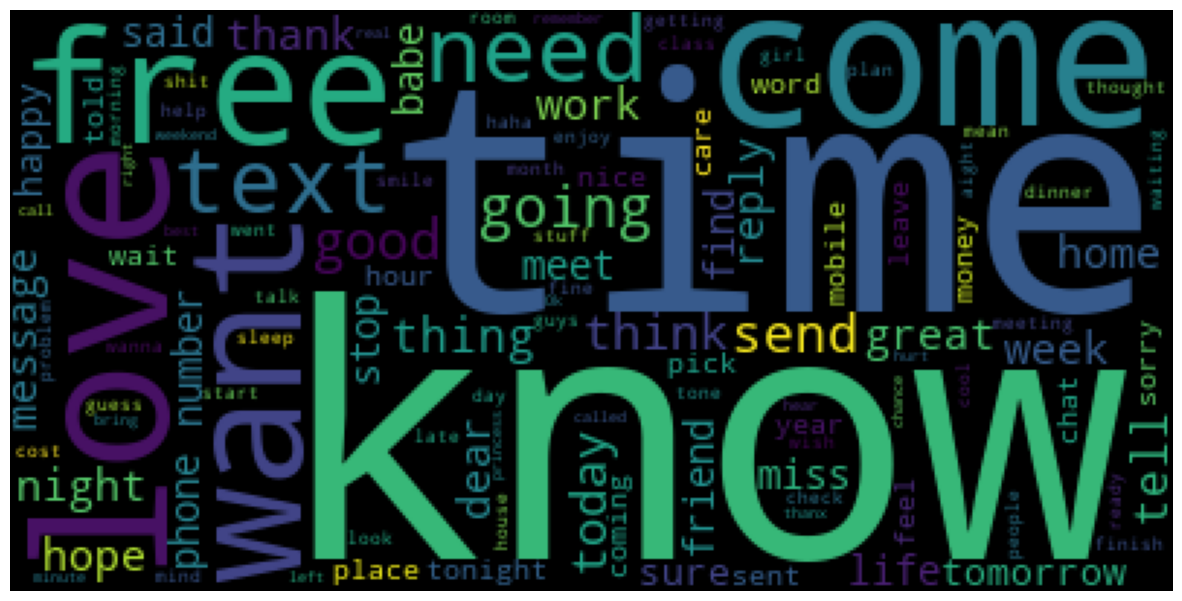

In [24]:
'''
Vizualizando o resultado final do pré-processamento
com núvem de palavras
'''
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(WordCloud().generate(result_total_message))